### Import Dataset

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("../datasets/heart.csv")
print(dataset.head())
print("####################################################################################")
print(dataset.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
####################################################################################
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.0000

### Pre-Process Date (Standardize)

In [34]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

x = dataset.drop(columns="HeartDisease")
y = dataset["HeartDisease"]

# turn string into numbers
x = x.apply(LabelEncoder().fit_transform)

# normalize
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

# train - test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x.shape, x_train.shape, x_test.shape)

(918, 11) (734, 11) (184, 11)


### PCA (Reduce Data Dimensions)
with this model you can reduce dimension of your inputs to make models faster & reduce overFitting

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Reduce dimensions to 3
pca.fit(x_train)
x_new_train = pca.transform(x_train)
x_new_test = pca.transform(x_test)
print(x_train.shape, x_new_train.shape)

(734, 11) (734, 3)


### Evaluate Model Function

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def calculate_model_metrics(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)

    print("confusion_matrix_train :", confusion_matrix_train)
    print("accuracy_train  :", accuracy_train)
    print("accuracy_test   :", accuracy_test)
    print("precision_test  :", precision_test)
    print("recall_test     :", recall_test)

    return accuracy_train, accuracy_test, precision_train , precision_test , recall_train , recall_test

### Naive Bayes Model

In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
nb_acc_train, nb_acc_test, nb_p_train , nb_p_test , nb_r_train , nb_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[265  54]
 [ 63 352]]
accuracy_train  : 0.840599455040872
accuracy_test   : 0.8478260869565217
precision_test  : 0.8282828282828283
recall_test     : 0.8817204301075269


### KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
knn_acc_train, knn_acc_test, knn_p_train , knn_p_test , knn_r_train , knn_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[292  27]
 [ 53 362]]
accuracy_train  : 0.8910081743869209
accuracy_test   : 0.8586956521739131
precision_test  : 0.8764044943820225
recall_test     : 0.8387096774193549


### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
model.fit(x_train, y_train)
dt_acc_train, dt_acc_test, dt_p_train , dt_p_test , dt_r_train , dt_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[294  25]
 [ 21 394]]
accuracy_train  : 0.9373297002724795
accuracy_test   : 0.782608695652174
precision_test  : 0.7912087912087912
recall_test     : 0.7741935483870968


### Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=17)
model.fit(x_train, y_train)
rf_acc_train, rf_acc_test, rf_p_train , rf_p_test , rf_r_train , rf_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[317   2]
 [  1 414]]
accuracy_train  : 0.9959128065395095
accuracy_test   : 0.8858695652173914
precision_test  : 0.875
recall_test     : 0.9032258064516129


### SVM Model

In [42]:
from sklearn import svm

svm.SVC(kernel="poly")
model.fit(x_train, y_train)
svm_acc_train, svm_acc_test, svm_p_train , svm_p_test , svm_r_train , svm_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[318   1]
 [  1 414]]
accuracy_train  : 0.997275204359673
accuracy_test   : 0.875
precision_test  : 0.8645833333333334
recall_test     : 0.8924731182795699


### Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
lr_acc_train, lr_acc_test, lr_p_train , lr_p_test , lr_r_train , lr_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[259  60]
 [ 53 362]]
accuracy_train  : 0.8460490463215259
accuracy_test   : 0.8695652173913043
precision_test  : 0.8556701030927835
recall_test     : 0.8924731182795699


### ANN (Artificial Neural Network)

In [158]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=[35], max_iter=180, activation="relu", solver="adam", batch_size=64)
model.fit(x_train,y_train)
ann_acc_train, ann_acc_test, ann_p_train, ann_p_test, ann_r_train, ann_r_test = calculate_model_metrics(model)

confusion_matrix_train : [[261  58]
 [ 43 372]]
accuracy_train  : 0.8623978201634878
accuracy_test   : 0.8641304347826086
precision_test  : 0.84
recall_test     : 0.9032258064516129


/home/samans76/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparison

Text(0, 0.5, 'Accuracy')

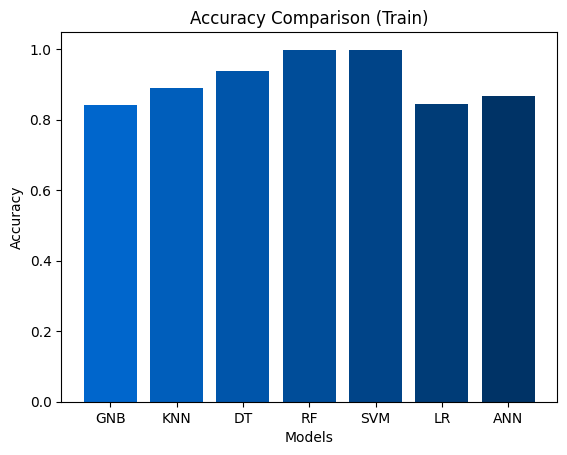

In [45]:
titles = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = [ "#0066CC", "#005EBB", "#0055AA", "#004D99", "#004488", "#003C77", "#003366"]

acc_train = [nb_acc_train, knn_acc_train, dt_acc_train, rf_acc_train, svm_acc_train, lr_acc_train, ann_acc_train]
plt.bar(titles, acc_train, color=colors)
plt.title('Accuracy Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

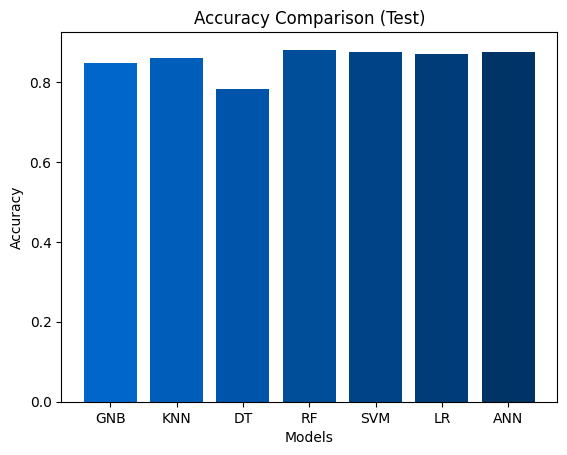

In [46]:
acc_test = [nb_acc_test, knn_acc_test, dt_acc_test, rf_acc_test, svm_acc_test, lr_acc_test, ann_acc_test]
plt.bar(titles, acc_test, color=colors)
plt.title('Accuracy Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

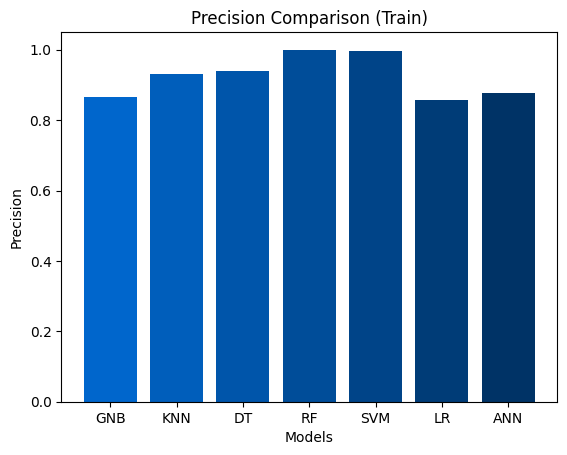

In [47]:
p_train = [nb_p_train, knn_p_train, dt_p_train, rf_p_train, svm_p_train, lr_p_train, ann_p_train]
plt.bar(titles, p_train, color=colors)
plt.title('Precision Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Precision')

Text(0, 0.5, 'Precision')

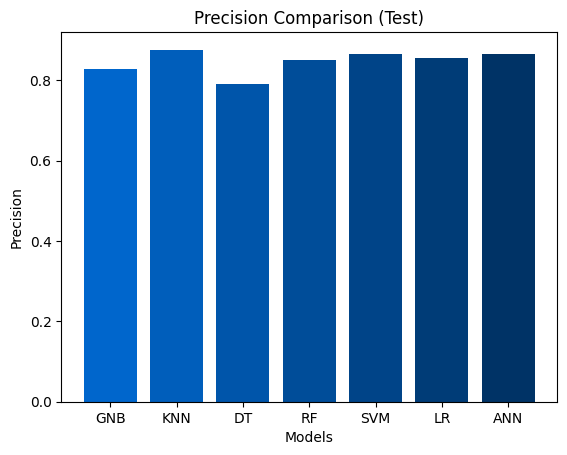

In [48]:
p_test = [nb_p_test, knn_p_test, dt_p_test, rf_p_test, svm_p_test, lr_p_test, ann_p_test]
plt.bar(titles, p_test, color=colors)
plt.title('Precision Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Precision')


Text(0, 0.5, 'Recall')

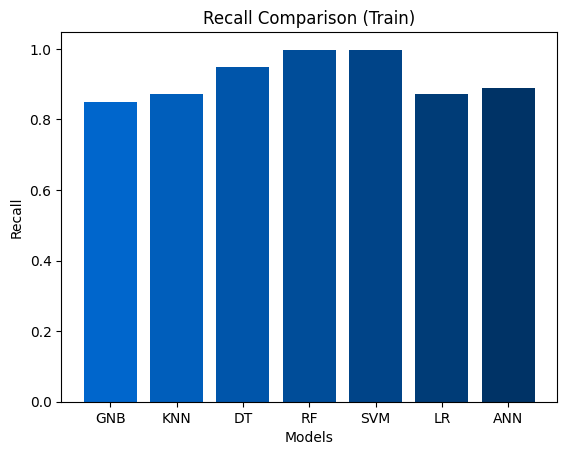

In [49]:
r_train = [nb_r_train, knn_r_train, dt_r_train, rf_r_train, svm_r_train, lr_r_train, ann_r_train]
plt.bar(titles, r_train, color=colors)
plt.title('Recall Comparison (Train)')
plt.xlabel('Models')
plt.ylabel('Recall')


Text(0, 0.5, 'Recall')

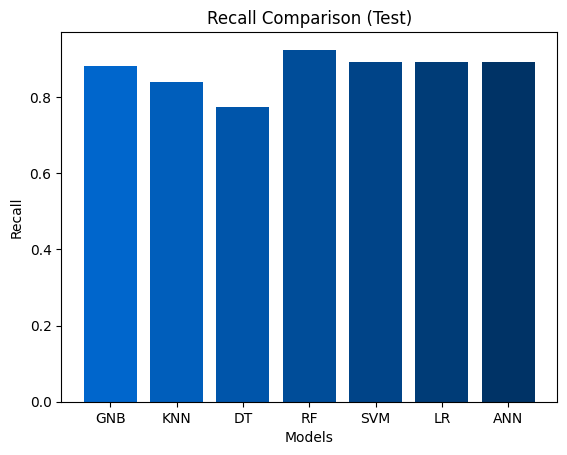

In [50]:
r_test = [nb_r_test, knn_r_test, dt_r_test, rf_r_test, svm_r_test, lr_r_test, ann_r_test]
plt.bar(titles, r_test, color=colors)
plt.title('Recall Comparison (Test)')
plt.xlabel('Models')
plt.ylabel('Recall')

## Deep Learning

In [169]:
import keras

NN = keras.Sequential()
NN.add(keras.layers.Dense(units=256, activation="relu" ,input_shape=[11]))
# NN.add(keras.layers.Dense(units=300, activation="relu"))
NN.add(keras.layers.Dropout(0.5))
NN.add(keras.layers.Dense(units=256, activation="relu"))
NN.add(keras.layers.Dropout(0.6))
NN.add(keras.layers.Dense(units=256, activation="relu"))
NN.add(keras.layers.Dropout(0.5))
# NN.add(keras.layers.Dense(units=64, activation="relu"))
NN.add(keras.layers.Dense(units=1, activation="sigmoid"))
NN.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy, metrics=['accuracy'])

callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True) 
history = NN.fit(x_train, y_train, batch_size=32, epochs=80, validation_data=(x_test, y_test), callbacks=[callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5547 - loss: 0.6825 - val_accuracy: 0.7717 - val_loss: 0.5553
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7302 - loss: 0.5202 - val_accuracy: 0.8261 - val_loss: 0.4144
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8154 - loss: 0.4317 - val_accuracy: 0.8424 - val_loss: 0.4038
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.4099 - val_accuracy: 0.8315 - val_loss: 0.4005
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8360 - loss: 0.3967 - val_accuracy: 0.8533 - val_loss: 0.3805
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8509 - loss: 0.3429 - val_accuracy: 0.8641 - val_loss: 0.3641
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8336 - loss: 0.3923 - val_accuracy: 0.8696 - val_loss: 0.3635
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8208 - loss: 0.4343 - val_accuracy: 0.8750 - val_los

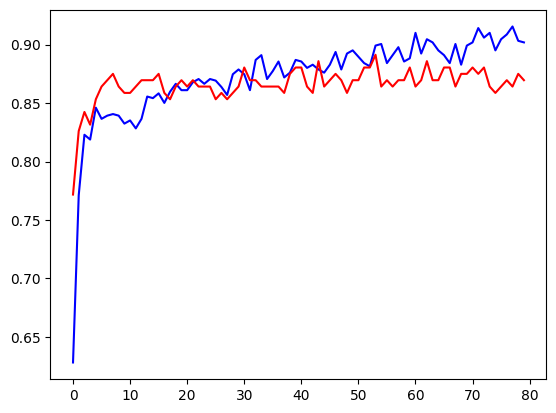

In [170]:
plt.plot(history.history["accuracy"], color="blue")
plt.plot(history.history["val_accuracy"], color="red")

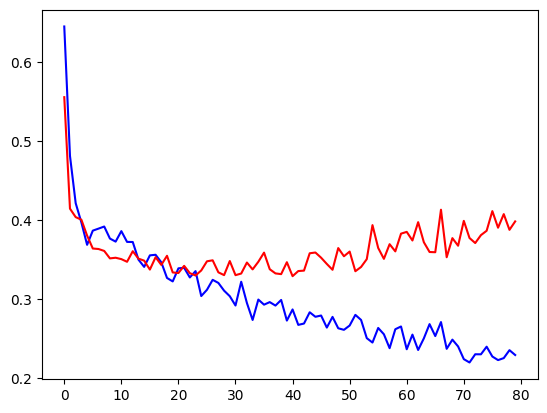

In [171]:
plt.plot(history.history["loss"], color="blue")
plt.plot(history.history["val_loss"], color="red")

In [172]:
y_train_pred = NN.predict(x_train)
y_test_pred = NN.predict(x_test)
y_train_pred = [1 if i > 0.5 else 0 for i in y_train_pred]
y_test_pred = [1 if i > 0.5 else 0 for i in y_test_pred]

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

print("accuracy_train  :", accuracy_train)
print("accuracy_test   :", accuracy_test)
print("precision_test  :", precision_test)
print("recall_test     :", recall_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
accuracy_train  : 0.9032697547683923
accuracy_test   : 0.8913043478260869
precision_test  : 0.8686868686868687
recall_test     : 0.9247311827956989
